In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##### Import the data

In [2]:
df = pd.read_csv('data/bookings.csv', dtype={
    'Year': str
})
df.head()

,Year,Month,Bookings
0,2006,Jan,383
1,2006,Feb,366
2,2006,Mar,250
3,2006,Apr,318
4,2006,May,334


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
Year        120 non-null object
Month       120 non-null object
Bookings    120 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


##### Build the index (year + month)

In [4]:
df['Period'] = df['Year'] + '-' + df['Month']

In [5]:
df['Period'] = pd.to_datetime(df['Period'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
Year        120 non-null object
Month       120 non-null object
Bookings    120 non-null int64
Period      120 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ KB


In [7]:
df.set_index('Period', inplace=True)

**We'll drop the unused columns**

In [8]:
df.drop(['Year', 'Month'], axis='columns', inplace=True)

**And this is the final result:**

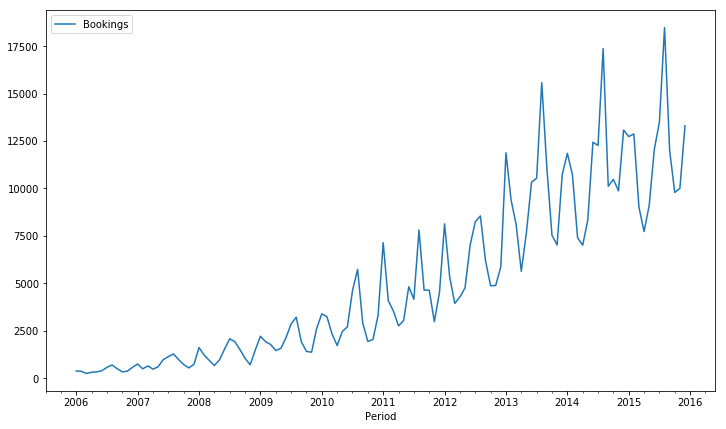

In [9]:
df.plot(figsize=(12, 7))

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

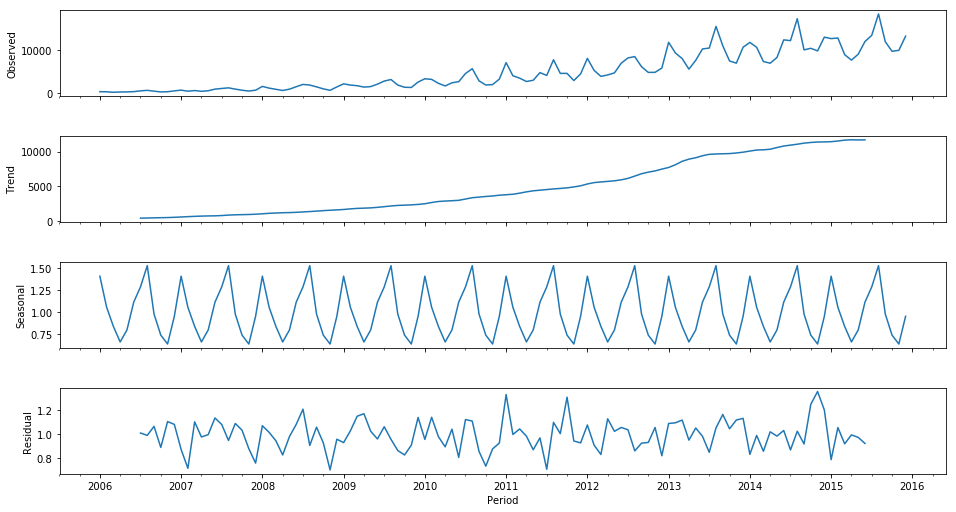

In [11]:
result = seasonal_decompose(df['Bookings'], model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

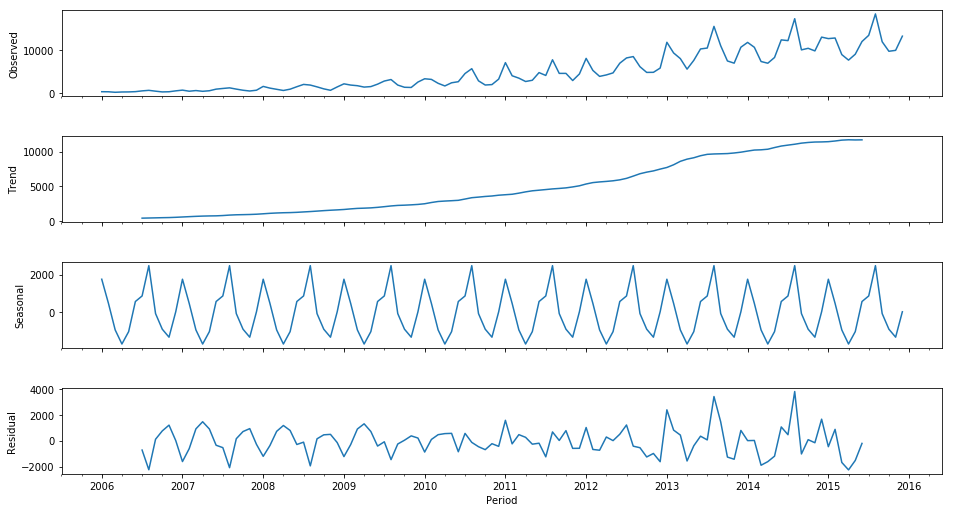

In [12]:
result = seasonal_decompose(df['Bookings'], model='additive')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)